# Case Study 2 Data Clean Up 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer

In [5]:
#import data:
df_db_recat = pd.read_csv(r"C:\Paritosh\SMU\7333 Quantifying the World\Proj\CS2\diabetic_data_recategorized.csv")
df_id = pd.read_csv(r"C:\Paritosh\SMU\7333 Quantifying the World\Proj\CS2\IDs_mapping.csv")

In [6]:
#view the head of the dataframe
df_db_recat.head()

,Unnamed: 0,race,gender,age,admission_type_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,metformin-pioglitazone,change,diabetesMed,readmitted,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized,total_diag
0,0,Caucasian,Female,[0-10),6,1,NaN,Pediatrics-Endocrinology,41,0,...,No,No,No,NO,NaN,referral,C,NaN,NaN,1
1,1,Caucasian,Female,[10-20),1,3,NaN,NaN,59,0,...,No,Ch,Yes,>30,discharged,emergency,C,C,C,3
2,2,AfricanAmerican,Female,[20-30),1,2,NaN,NaN,11,5,...,No,No,Yes,NO,discharged,emergency,K,C,R,3
3,3,Caucasian,Male,[30-40),1,2,NaN,NaN,44,1,...,No,Ch,Yes,NO,discharged,emergency,A,C,G,3
4,4,Caucasian,Male,[40-50),1,1,NaN,NaN,51,0,...,No,Ch,Yes,NO,discharged,emergency,B,B,C,3


In [7]:
df_db_recat.shape

(101766, 48)

In [11]:
#drop identification columns and columns with same value (examide and citoglipton)
df = df_db_recat.drop(['citoglipton'], axis = 1)

In [14]:
#replace values of targets
df['readmitted'] = df['readmitted'].replace(['>30'],0) # Study is focused on with in 30 days so can be in bucket of no readmission
df['readmitted'] = df['readmitted'].replace(['NO'],0) # no admission 
df['readmitted'] = df['readmitted'].replace(['<30'],1) # readmission in 30 days
# df['readmitted'].head(20)
# df.groupby('readmitted').count()

In [15]:
# identify missing value chage ? to nan
df = df.replace('?', np.nan)
df.head()

,Unnamed: 0,race,gender,age,admission_type_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,metformin-pioglitazone,change,diabetesMed,readmitted,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized,total_diag
0,0,Caucasian,Female,[0-10),6,1,NaN,Pediatrics-Endocrinology,41,0,...,No,No,No,0,NaN,referral,C,NaN,NaN,1
1,1,Caucasian,Female,[10-20),1,3,NaN,NaN,59,0,...,No,Ch,Yes,0,discharged,emergency,C,C,C,3
2,2,AfricanAmerican,Female,[20-30),1,2,NaN,NaN,11,5,...,No,No,Yes,0,discharged,emergency,K,C,R,3
3,3,Caucasian,Male,[30-40),1,2,NaN,NaN,44,1,...,No,Ch,Yes,0,discharged,emergency,A,C,G,3
4,4,Caucasian,Male,[40-50),1,1,NaN,NaN,51,0,...,No,Ch,Yes,0,discharged,emergency,B,B,C,3


<AxesSubplot:>

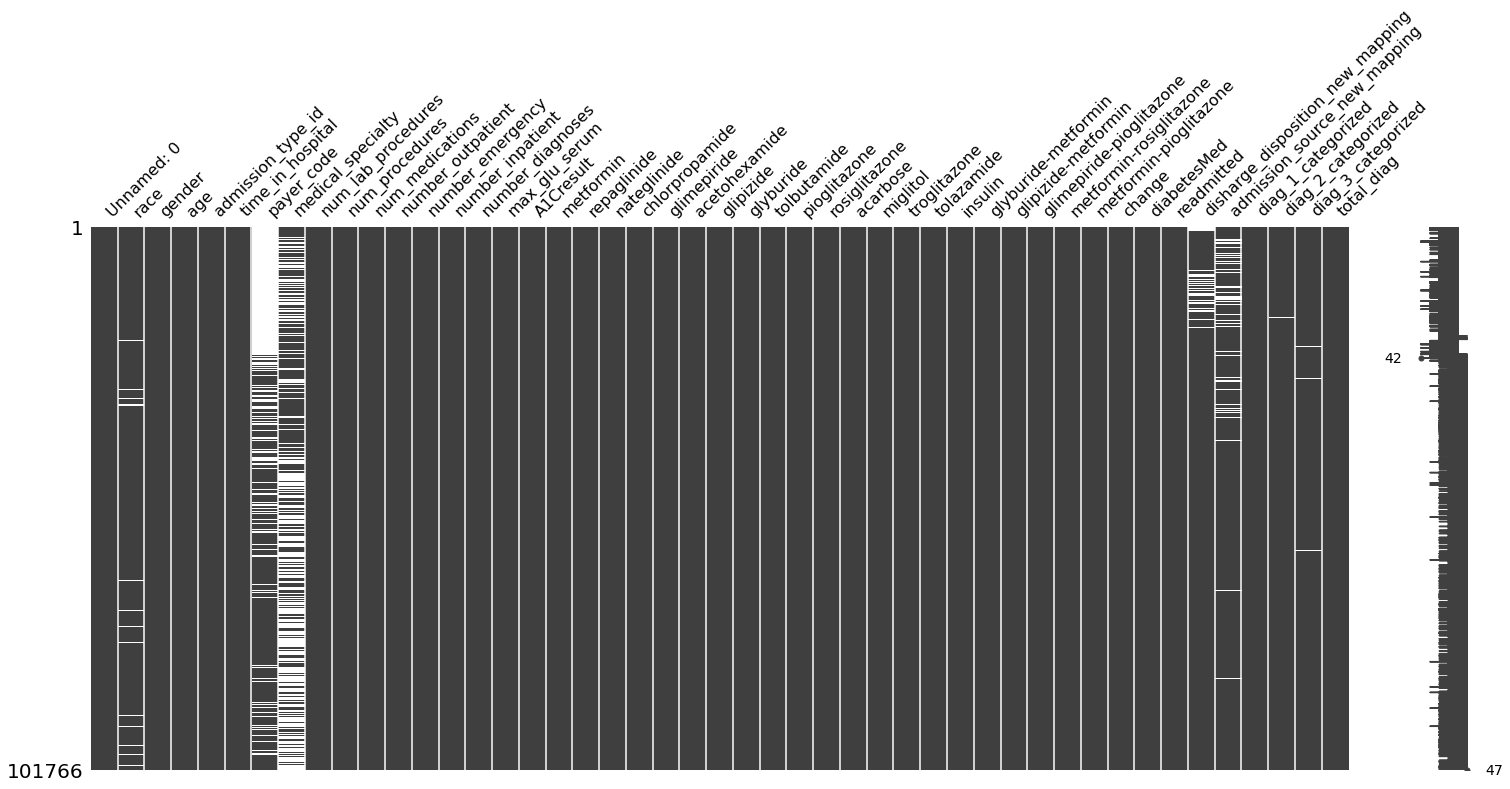

In [16]:
#The bar matrix below represents the entire data frame and the white spaces show where data is missing.
msno.matrix(df)

<AxesSubplot:>

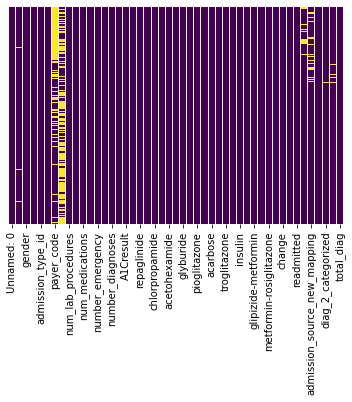

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='readmitted', ylabel='count'>

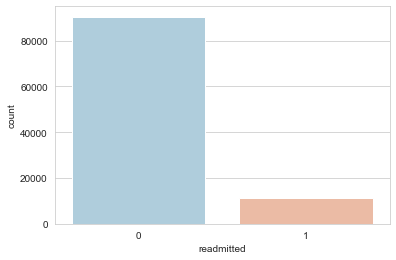

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='readmitted',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='readmitted', ylabel='count'>

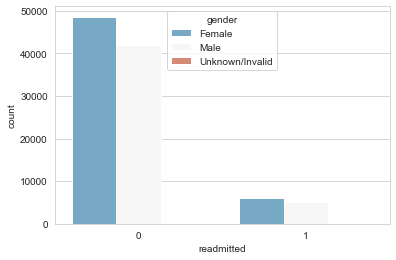

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='readmitted',hue='gender',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='readmitted', ylabel='count'>

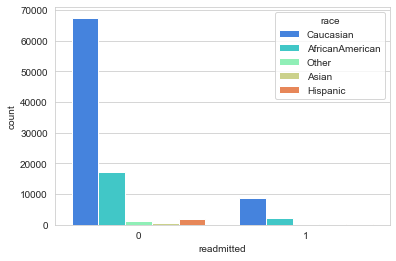

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='readmitted',hue='race',data=df,palette='rainbow')

In [21]:
#find missing value
df.isna().sum()

Unnamed: 0                              0
race                                 2273
gender                                  0
age                                     0
admission_type_id                       0
time_in_hospital                        0
payer_code                          40256
medical_specialty                   49949
num_lab_procedures                      0
num_procedures                          0
num_medications                         0
number_outpatient                       0
number_emergency                        0
number_inpatient                        0
number_diagnoses                        0
max_glu_serum                           0
A1Cresult                               0
metformin                               0
repaglinide                             0
nateglinide                             0
chlorpropamide                          0
glimepiride                             0
acetohexamide                           0
glipizide                         

<AxesSubplot:>

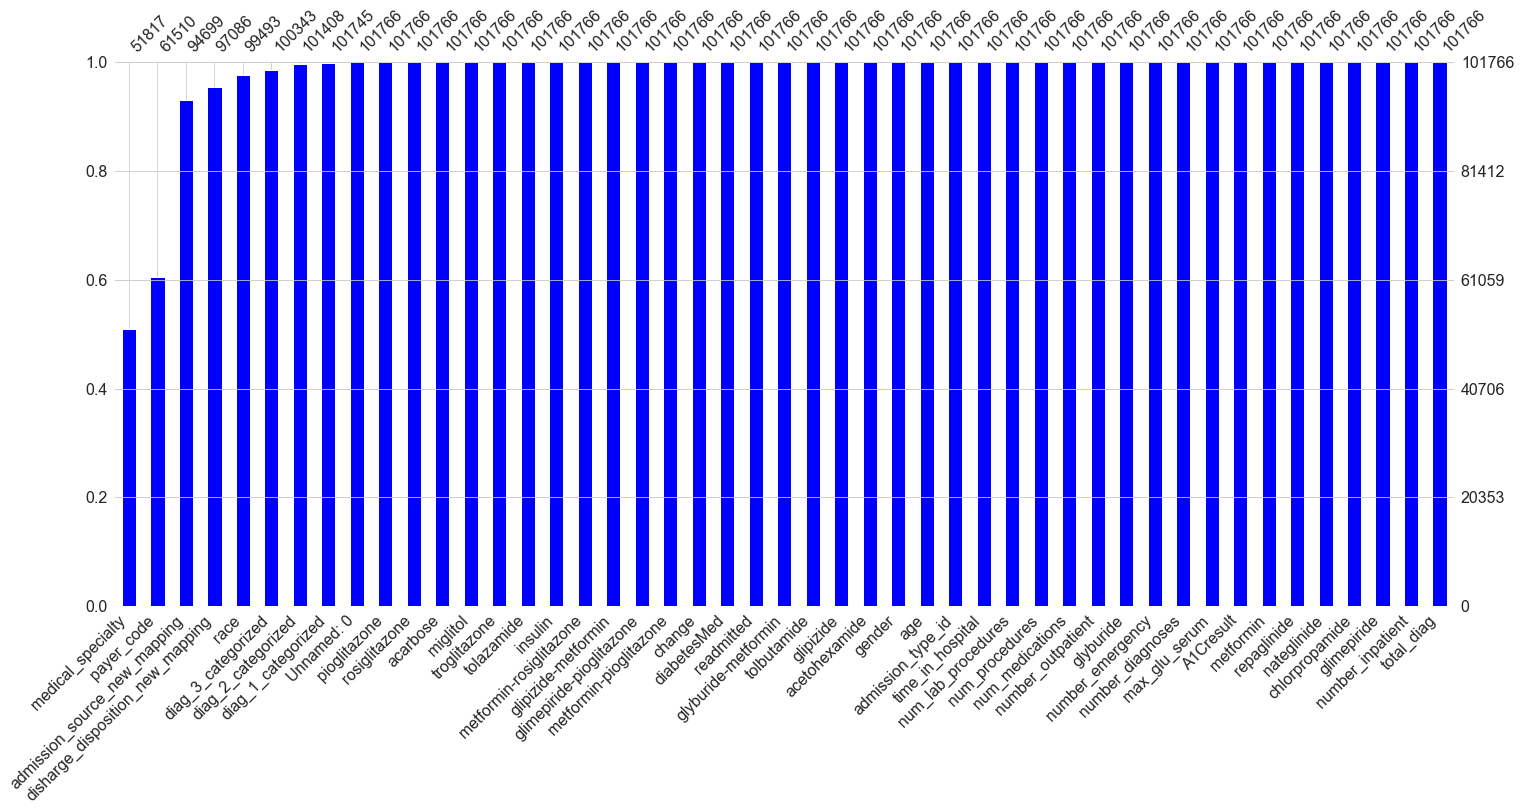

In [22]:
print("")
msno.bar(df, sort="ascending", color="blue")

In [25]:
#drop weight
#df1 = df.drop(['weight'], axis = 1)

In [26]:
#drop weight
df2 = df.drop(['readmitted'], axis = 1)

In [27]:
# Column names of features coded as continuous

cont_summary = df2.describe()
cont_summary

,Unnamed: 0,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,50882.500000,2.024006,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,2.982293
std,29377.458084,1.445403,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.151382
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,25441.250000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,3.000000
50%,50882.500000,1.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,3.000000
75%,76323.750000,3.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,3.000000
max,101765.000000,8.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,3.000000


# Prepare Test and Train Data

In [29]:
## X for explanatory variables and y for the response variable
y = df['readmitted']
X = df.drop('readmitted', axis=1)
print('Size of target vector: ', y.shape)
print('='*50)
print('Size of explanatory matrix: ',X.shape)

Size of target vector:  (101766,)
Size of explanatory matrix:  (101766, 46)


In [30]:
## counting unique values of targets 
print("split between 0 and 1 of binary classes:  \n", '-----------------')
print(y.value_counts())
'''The data looks a bit unbalanced (89:11 split). So, we will use StratifiedKFold to create test and train data'''

split between 0 and 1 of binary classes:  
 -----------------
0    90409
1    11357
Name: readmitted, dtype: int64


'The data looks a bit unbalanced (89:11 split). So, we will use StratifiedKFold to create test and train data'

In [31]:
## Creating training and test data using StratifiedKFold
from sklearn.model_selection import StratifiedKFold, KFold

cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=21)

for train, test in cv.split(X,y):
    X_train = X.iloc[train] 
    X_test  = X.iloc[test] 
    y_train = y[train]
    y_test  = y[test] 

# Train Data Set

In [32]:
df_train=pd.DataFrame(X_train)

In [33]:
df_train.head()

,Unnamed: 0,race,gender,age,admission_type_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized,total_diag
0,0,Caucasian,Female,[0-10),6,1,NaN,Pediatrics-Endocrinology,41,0,...,No,No,No,No,NaN,referral,C,NaN,NaN,1
1,1,Caucasian,Female,[10-20),1,3,NaN,NaN,59,0,...,No,No,Ch,Yes,discharged,emergency,C,C,C,3
2,2,AfricanAmerican,Female,[20-30),1,2,NaN,NaN,11,5,...,No,No,No,Yes,discharged,emergency,K,C,R,3
3,3,Caucasian,Male,[30-40),1,2,NaN,NaN,44,1,...,No,No,Ch,Yes,discharged,emergency,A,C,G,3
4,4,Caucasian,Male,[40-50),1,1,NaN,NaN,51,0,...,No,No,Ch,Yes,discharged,emergency,B,B,C,3


In [34]:
df_test=pd.DataFrame(X_test)

In [35]:
df_train.head()

,Unnamed: 0,race,gender,age,admission_type_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized,total_diag
0,0,Caucasian,Female,[0-10),6,1,NaN,Pediatrics-Endocrinology,41,0,...,No,No,No,No,NaN,referral,C,NaN,NaN,1
1,1,Caucasian,Female,[10-20),1,3,NaN,NaN,59,0,...,No,No,Ch,Yes,discharged,emergency,C,C,C,3
2,2,AfricanAmerican,Female,[20-30),1,2,NaN,NaN,11,5,...,No,No,No,Yes,discharged,emergency,K,C,R,3
3,3,Caucasian,Male,[30-40),1,2,NaN,NaN,44,1,...,No,No,Ch,Yes,discharged,emergency,A,C,G,3
4,4,Caucasian,Male,[40-50),1,1,NaN,NaN,51,0,...,No,No,Ch,Yes,discharged,emergency,B,B,C,3


In [36]:
# Column names of features coded as continuous

cont_sum_train = df_train.describe()
cont_sum_train

,Unnamed: 0,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
count,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000
mean,50857.493755,2.022775,4.395010,43.115395,1.339808,16.018703,0.368195,0.197292,0.635277,7.422917,2.982356
std,29388.287591,1.445538,2.986019,19.661619,1.705306,8.127230,1.268101,0.905803,1.263490,1.932034,0.150753
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,25437.250000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,3.000000
50%,50840.500000,1.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,3.000000
75%,76312.750000,3.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,3.000000
max,101765.000000,8.000000,14.000000,132.000000,6.000000,79.000000,42.000000,76.000000,21.000000,16.000000,3.000000


In [37]:
#Continous Variable Column
cont_var_train=cont_sum_train.columns
cont_var_train

Index(['Unnamed: 0', 'admission_type_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'total_diag'],
      dtype='object')

In [38]:
#dataframe for Cont variable
df_cont_train=df_train[cont_var_train]
df_cont_train.head()

,Unnamed: 0,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
0,0,6,1,41,0,1,0,0,0,1,1
1,1,1,3,59,0,18,0,0,0,9,3
2,2,1,2,11,5,13,2,0,1,6,3
3,3,1,2,44,1,16,0,0,0,7,3
4,4,1,1,51,0,8,0,0,0,5,3


In [40]:
cat_var_train = list(df_train.columns.drop(cont_var_train) )
cat_var_train

['race',
 'gender',
 'age',
 'payer_code',
 'medical_specialty',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'disharge_disposition_new_mapping',
 'admission_source_new_mapping',
 'diag_1_categorized',
 'diag_2_categorized',
 'diag_3_categorized']

In [42]:
#data_fram for Cat_variable
df_cat_train=df_train[cat_var_train]
df_cat_train.head()

,race,gender,age,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized
0,Caucasian,Female,[0-10),NaN,Pediatrics-Endocrinology,None,None,No,No,No,...,No,No,No,No,No,NaN,referral,C,NaN,NaN
1,Caucasian,Female,[10-20),NaN,NaN,None,None,No,No,No,...,No,No,No,Ch,Yes,discharged,emergency,C,C,C
2,AfricanAmerican,Female,[20-30),NaN,NaN,None,None,No,No,No,...,No,No,No,No,Yes,discharged,emergency,K,C,R
3,Caucasian,Male,[30-40),NaN,NaN,None,None,No,No,No,...,No,No,No,Ch,Yes,discharged,emergency,A,C,G
4,Caucasian,Male,[40-50),NaN,NaN,None,None,No,No,No,...,No,No,No,Ch,Yes,discharged,emergency,B,B,C


In [43]:
#Find missing value in categorical variable
df_cat_train.isna().sum()
# no missing value in cont variable

race                                 2059
gender                                  0
age                                     0
payer_code                          36214
medical_specialty                   45002
max_glu_serum                           0
A1Cresult                               0
metformin                               0
repaglinide                             0
nateglinide                             0
chlorpropamide                          0
glimepiride                             0
acetohexamide                           0
glipizide                               0
glyburide                               0
tolbutamide                             0
pioglitazone                            0
rosiglitazone                           0
acarbose                                0
miglitol                                0
troglitazone                            0
tolazamide                              0
insulin                                 0
glyburide-metformin               

In [44]:
from sklearn.impute import KNNImputer

cat_variables_train =df_train[cat_var_train]
cat_dummies = pd.get_dummies(cat_variables_train, drop_first=True)
cat_dummies.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,diag_3_categorized_I,diag_3_categorized_J,diag_3_categorized_K,diag_3_categorized_L,diag_3_categorized_M,diag_3_categorized_N,diag_3_categorized_P,diag_3_categorized_Q,diag_3_categorized_R,diag_3_categorized_S
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df2_train = df_cat_train.drop(['race',
 'gender',
 'age',
 'payer_code',
 'medical_specialty',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'disharge_disposition_new_mapping',
 'admission_source_new_mapping',
 'diag_1_categorized',
 'diag_2_categorized',
 'diag_3_categorized'], axis=1)
df3_train = pd.concat([df2_train, cat_dummies], axis=1)
df3_train.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,diag_3_categorized_I,diag_3_categorized_J,diag_3_categorized_K,diag_3_categorized_L,diag_3_categorized_M,diag_3_categorized_N,diag_3_categorized_P,diag_3_categorized_Q,diag_3_categorized_R,diag_3_categorized_S
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#scale the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3s_train = pd.DataFrame(scaler.fit_transform(df3_train), columns = df3_train.columns)
df3s_train.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,diag_3_categorized_I,diag_3_categorized_J,diag_3_categorized_K,diag_3_categorized_L,diag_3_categorized_M,diag_3_categorized_N,diag_3_categorized_P,diag_3_categorized_Q,diag_3_categorized_R,diag_3_categorized_S
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#dataframe for Cont variable
df_cont_train=df_train[cont_var_train]
df_cont_train.head()

,Unnamed: 0,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
0,0,6,1,41,0,1,0,0,0,1,1
1,1,1,3,59,0,18,0,0,0,9,3
2,2,1,2,11,5,13,2,0,1,6,3
3,3,1,2,44,1,16,0,0,0,7,3
4,4,1,1,51,0,8,0,0,0,5,3


In [50]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df4_train = pd.DataFrame(imputer.fit_transform(df3s_train),columns = df3s_train.columns)

In [51]:
df4_train.isna().any()

race_Asian              False
race_Caucasian          False
race_Hispanic           False
race_Other              False
gender_Male             False
                        ...  
diag_3_categorized_N    False
diag_3_categorized_P    False
diag_3_categorized_Q    False
diag_3_categorized_R    False
diag_3_categorized_S    False
Length: 218, dtype: bool

In [52]:
df4_train.isna().sum()

race_Asian              0
race_Caucasian          0
race_Hispanic           0
race_Other              0
gender_Male             0
                       ..
diag_3_categorized_N    0
diag_3_categorized_P    0
diag_3_categorized_Q    0
diag_3_categorized_R    0
diag_3_categorized_S    0
Length: 218, dtype: int64

In [53]:
df4_train.shape

(91590, 218)

# Create Test Dataset

In [63]:
df_test=pd.DataFrame(X_test)

In [64]:
df_test.head()

,Unnamed: 0,race,gender,age,admission_type_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized,total_diag
7,7,Caucasian,Male,[70-80),1,5,NaN,NaN,73,0,...,No,No,No,Yes,discharged,emergency,G,H,C,3
14,14,AfricanAmerican,Female,[60-70),3,1,NaN,NaN,49,5,...,No,No,No,Yes,discharged,referral,H,Q,J,3
32,32,Caucasian,Female,[70-80),1,6,NaN,Family/GeneralPractice,27,0,...,No,No,No,Yes,discharged,emergency,Q,Q,C,3
34,34,Caucasian,Female,[70-80),2,5,NaN,NaN,46,2,...,No,No,Ch,Yes,expired,referral,G,J,G,3
37,37,Caucasian,Female,[60-70),1,4,NaN,NaN,33,0,...,No,No,Ch,Yes,discharged,emergency,H,C,C,3


In [65]:
df_test=pd.DataFrame(X_test)

In [66]:
df_test.head()

,Unnamed: 0,race,gender,age,admission_type_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized,total_diag
7,7,Caucasian,Male,[70-80),1,5,NaN,NaN,73,0,...,No,No,No,Yes,discharged,emergency,G,H,C,3
14,14,AfricanAmerican,Female,[60-70),3,1,NaN,NaN,49,5,...,No,No,No,Yes,discharged,referral,H,Q,J,3
32,32,Caucasian,Female,[70-80),1,6,NaN,Family/GeneralPractice,27,0,...,No,No,No,Yes,discharged,emergency,Q,Q,C,3
34,34,Caucasian,Female,[70-80),2,5,NaN,NaN,46,2,...,No,No,Ch,Yes,expired,referral,G,J,G,3
37,37,Caucasian,Female,[60-70),1,4,NaN,NaN,33,0,...,No,No,Ch,Yes,discharged,emergency,H,C,C,3


In [67]:
# Column names of features coded as continuous

cont_sum_test = df_test.describe()
cont_sum_test

,Unnamed: 0,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
count,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000
mean,51107.570951,2.035083,4.404776,42.917846,1.339033,16.050118,0.379815,0.202732,0.638168,7.419811,2.981722
std,29280.284494,1.444212,2.977025,19.788770,1.710391,8.130934,1.259734,1.128534,1.257263,1.947734,0.156936
min,7.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,25496.750000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,3.000000
50%,51365.000000,1.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,3.000000
75%,76454.250000,3.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,3.000000
max,101761.000000,8.000000,14.000000,129.000000,6.000000,81.000000,40.000000,64.000000,16.000000,16.000000,3.000000


In [68]:
#Continous Variable Column
cont_var_test=cont_sum_test.columns
cont_var_test

Index(['Unnamed: 0', 'admission_type_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'total_diag'],
      dtype='object')

In [69]:
#dataframe for Cont variable
df_cont_test=df_test[cont_var_test]
df_cont_test.head()

,Unnamed: 0,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
7,7,1,5,73,0,12,0,0,0,8,3
14,14,3,1,49,5,2,0,0,0,8,3
32,32,1,6,27,0,16,0,0,0,8,3
34,34,2,5,46,2,20,0,0,0,9,3
37,37,1,4,33,0,12,0,0,0,3,3


In [70]:
cat_var_test = list(df_test.columns.drop(cont_var_test) )
cat_var_test

['race',
 'gender',
 'age',
 'payer_code',
 'medical_specialty',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'disharge_disposition_new_mapping',
 'admission_source_new_mapping',
 'diag_1_categorized',
 'diag_2_categorized',
 'diag_3_categorized']

In [71]:
#data_fram for Cat_variable
df_cat_test=df_test[cat_var_test]
df_cat_test.head()

,race,gender,age,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized
7,Caucasian,Male,[70-80),NaN,NaN,None,None,No,No,No,...,No,No,No,No,Yes,discharged,emergency,G,H,C
14,AfricanAmerican,Female,[60-70),NaN,NaN,None,None,No,No,No,...,No,No,No,No,Yes,discharged,referral,H,Q,J
32,Caucasian,Female,[70-80),NaN,Family/GeneralPractice,None,None,No,No,No,...,No,No,No,No,Yes,discharged,emergency,Q,Q,C
34,Caucasian,Female,[70-80),NaN,NaN,None,None,No,No,No,...,No,No,No,Ch,Yes,expired,referral,G,J,G
37,Caucasian,Female,[60-70),NaN,NaN,None,None,Steady,No,No,...,No,No,No,Ch,Yes,discharged,emergency,H,C,C


In [72]:
#Find missing value in categorical variable
df_cat_test.isna().sum()


race                                 214
gender                                 0
age                                    0
payer_code                          4042
medical_specialty                   4947
max_glu_serum                          0
A1Cresult                              0
metformin                              0
repaglinide                            0
nateglinide                            0
chlorpropamide                         0
glimepiride                            0
acetohexamide                          0
glipizide                              0
glyburide                              0
tolbutamide                            0
pioglitazone                           0
rosiglitazone                          0
acarbose                               0
miglitol                               0
troglitazone                           0
tolazamide                             0
insulin                                0
glyburide-metformin                    0
glipizide-metfor

In [73]:
from sklearn.impute import KNNImputer

cat_variables_test =df_test[cat_var_test]
cat_dummies_test = pd.get_dummies(cat_variables_test, drop_first=True)
cat_dummies_test.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),...,diag_3_categorized_I,diag_3_categorized_J,diag_3_categorized_K,diag_3_categorized_L,diag_3_categorized_M,diag_3_categorized_N,diag_3_categorized_P,diag_3_categorized_Q,diag_3_categorized_R,diag_3_categorized_S
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df2_test = df_cat_test.drop(['race',
 'gender',
 'age',
 'payer_code',
 'medical_specialty',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'disharge_disposition_new_mapping',
 'admission_source_new_mapping',
 'diag_1_categorized',
 'diag_2_categorized',
 'diag_3_categorized'], axis=1)
df3_test = pd.concat([df2_test, cat_dummies_test], axis=1)
df3_test.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),...,diag_3_categorized_I,diag_3_categorized_J,diag_3_categorized_K,diag_3_categorized_L,diag_3_categorized_M,diag_3_categorized_N,diag_3_categorized_P,diag_3_categorized_Q,diag_3_categorized_R,diag_3_categorized_S
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#scale the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3s_test = pd.DataFrame(scaler.fit_transform(df3_test), columns = df3_test.columns)
df3s_test.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),...,diag_3_categorized_I,diag_3_categorized_J,diag_3_categorized_K,diag_3_categorized_L,diag_3_categorized_M,diag_3_categorized_N,diag_3_categorized_P,diag_3_categorized_Q,diag_3_categorized_R,diag_3_categorized_S
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
#dataframe for Cont variable
df_cont_test=df_test[cont_var_tes]
df_cont_test.head()

,Unnamed: 0,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
7,7,1,5,73,0,12,0,0,0,8,3
14,14,3,1,49,5,2,0,0,0,8,3
32,32,1,6,27,0,16,0,0,0,8,3
34,34,2,5,46,2,20,0,0,0,9,3
37,37,1,4,33,0,12,0,0,0,3,3


In [77]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df4_test = pd.DataFrame(imputer.fit_transform(df3s_test),columns = df3s_test.columns)

In [78]:
df4_test.isna().any()

race_Asian              False
race_Caucasian          False
race_Hispanic           False
race_Other              False
gender_Male             False
                        ...  
diag_3_categorized_N    False
diag_3_categorized_P    False
diag_3_categorized_Q    False
diag_3_categorized_R    False
diag_3_categorized_S    False
Length: 187, dtype: bool

In [79]:
df4_test.isna().sum()

race_Asian              0
race_Caucasian          0
race_Hispanic           0
race_Other              0
gender_Male             0
                       ..
diag_3_categorized_N    0
diag_3_categorized_P    0
diag_3_categorized_Q    0
diag_3_categorized_R    0
diag_3_categorized_S    0
Length: 187, dtype: int64

In [80]:
df4_test.shape

(10176, 187)